
# Category Spending Breakdown
-----------------------------------
Goal:
Identify main spending areas by categorizing transactions and calculating total expenses.

Steps:
1. Clean transaction descriptions (lowercase + regex).
2. Assign categories based on keywords.
3. Filter only debit transactions.
  - Aggregate spending by category and sort descending.
  - Visualize results with a bar chart and save it as PNG.
  - Some insights based on the bar chart
4. Filter only credit transactions.
  - Aggregate spending by category and sort descending.
  - Visualize results with a bar chart and save it as PNG.
  - Some insights based on the bar chart.
5. Filter only transfer transactions.
  - Aggregate spending by category and sort descending.
  - Visualize results with a bar chart and save it as PNG.
  - Some insights based on the bar chart.
  
6. Comparison between Debit and Credit Total Spending




total debit spending by category:
Category
Miscellaneous    98049048.19
Shopping         16835344.14
Entertainment    12194430.87
Education        11002112.80
Utilities         8436925.55
Health            6946921.88
Transport         6848868.14
Travel            4649683.34
Groceries         1260128.68
Name: amount, dtype: float64


/tmp/ipython-input-1542213052.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_spending_by_category.index,


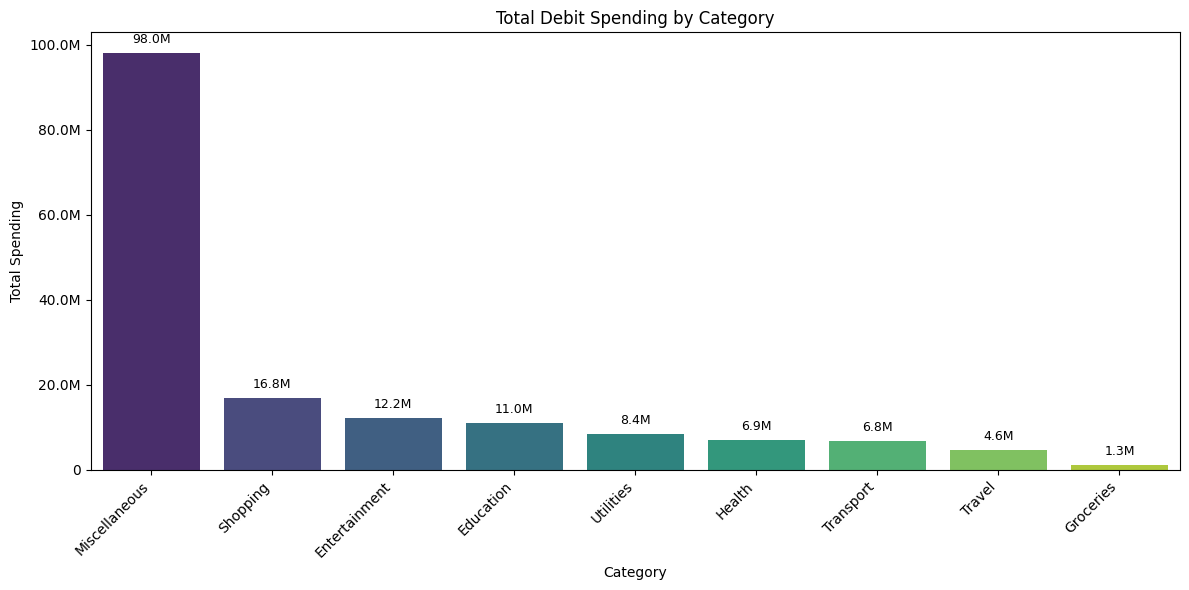

Bar chart saved as 'category_spending_bar_chart.png'.


In [12]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Load dataset and clean transactions
df = pd.read_csv('financial_transactions.csv')

df['cleaned_description'] = df['description'].str.lower()
df['cleaned_description'] = df['cleaned_description'].apply(lambda x: re.sub(r'[\W_]+', ' ', x))


# 2. Define categories by keywords
category_keywords = {
    'Groceries': ['supermarket', 'grocery', 'food', 'market', 'sainsbury', 'tesco', 'aldi', 'lidl', 'whole foods', 'eats', 'meal', 'fresh'],
    'Transport': ['bus', 'train', 'uber', 'taxi', 'fuel', 'petrol', 'gas', 'transport', 'metro', 'car', 'ride', 'road', 'way', 'direction'],
    'Utilities': ['electricity', 'water', 'internet', 'rent', 'utility', 'bill', 'mobile', 'payment', 'service', 'home', 'house', 'light', 'electric', 'phone', 'cost', 'charge'],
    'Entertainment': ['movie', 'cinema', 'concert', 'theater', 'game', 'bar', 'restaurant', 'club', 'leisure', 'event', 'dinner', 'film', 'play', 'show', 'fun', 'happy', 'music', 'party', 'star', 'enjoy'],
    'Shopping': ['store', 'shop', 'retail', 'clothes', 'amazon', 'online', 'purchase', 'boutique', 'computer', 'paper', 'tv', 'gift', 'item', 'product', 'sale', 'new', 'old', 'white', 'green', 'big', 'bag', 'box', 'price', 'list'],
    'Health': ['pharmacy', 'hospital', 'doctor', 'clinic', 'medical', 'health', 'medication', 'care', 'drug', 'medicine', 'sick', 'well'],
    'Travel': ['hotel', 'flight', 'travel', 'airline', 'vacation', 'trip', 'booking', 'conference', 'tour', 'journey', 'airport', 'foreign', 'destination'],
    'Education': ['school', 'course', 'university', 'college', 'tuition', 'study', 'book', 'education', 'learn', 'class', 'student', 'teacher', 'knowledge', 'ability'],
    'Salary': ['salary', 'paycheck', 'income', 'wage', 'payroll']
}

df['Category'] = 'Miscellaneous'
for category, keywords in category_keywords.items():
    for keyword in keywords:
        df.loc[df['cleaned_description'].str.contains(keyword, na=False), 'Category'] = category

# 3. Filter only debit transactions.
expense_df = df[df['type'] == 'debit'].copy()


total_spending_by_category = (
    expense_df.groupby('Category')['amount']
    .sum()
    .sort_values(ascending=False)
)

print("total debit spending by category:")
print(total_spending_by_category)

# to Generate and save  the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_spending_by_category.index,
                 y=total_spending_by_category.values,
                 palette='viridis')

plt.title('Total Debit Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')

def currency_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    elif x >= 1_000:
        return f'{x*1e-3:.1f}k'
    else:
        return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

for p in ax.patches:
    value = p.get_height()
    ax.annotate(currency_formatter(value, None),
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.savefig('debit_category_spending_bar_chart.png', bbox_inches='tight')
plt.show()

print("Bar chart saved as 'debit_category_spending_bar_chart.png'.")


### Key Insights from Spending Distribution

- The **Miscellaneous** category remains the largest, totaling **98.0M**.
- **Shopping**, **Entertainment**, and **Education** show substantial spending, revealing clearer patterns in consumer behavior.
- The refined categorization enables better budget analysis and highlights areas with potential for cost optimization.


Total Spending by category:
Category
Miscellaneous    98827003.43
Shopping         17222507.58
Entertainment    11681094.91
Education        11076797.64
Utilities         8656711.60
Health            7019003.65
Transport         6713286.70
Travel            4346967.28
Groceries         1127218.72
Name: amount, dtype: float64


/tmp/ipython-input-1846044593.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_income = sns.barplot(x=total_income_by_category.index,


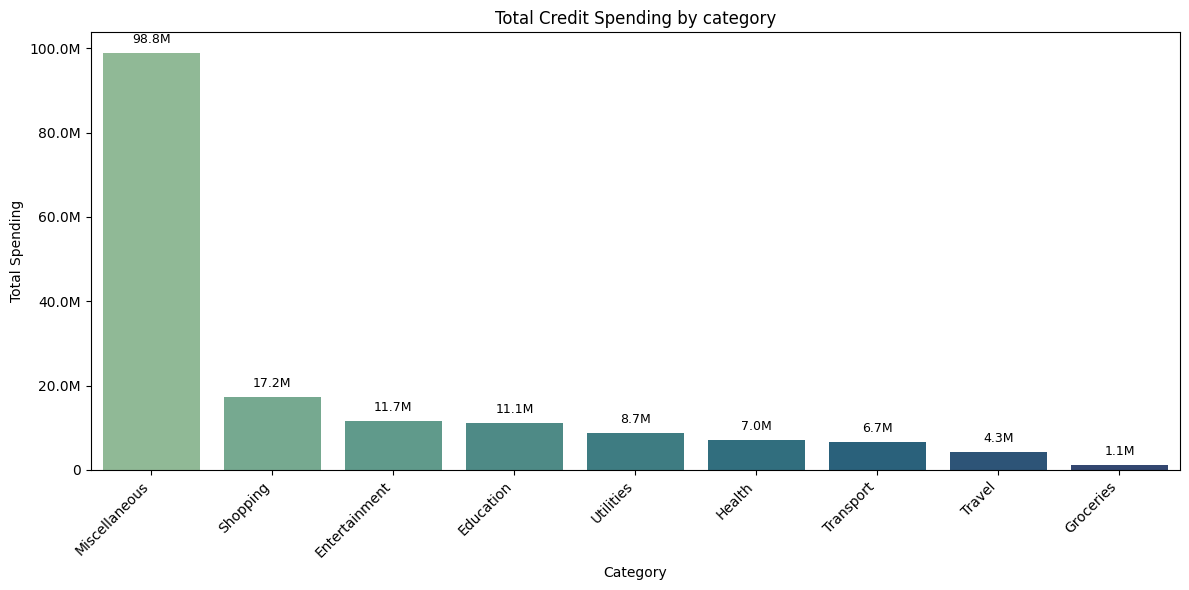

Bar chart saved as 'credit_category_spending_bar_chart.png'.


In [13]:
# 4. Filter for income transactions ('credit')
income_df = df[df['type'] == 'credit'].copy()


total_income_by_category = (
    income_df.groupby('Category')['amount']
    .sum()
    .sort_values(ascending=False)
)

print("Total Spending by category:")
print(total_income_by_category)

# Generate and save the income bar chart
plt.figure(figsize=(12, 6))
ax_income = sns.barplot(x=total_income_by_category.index,
                        y=total_income_by_category.values,
                        palette='crest')

plt.title('Total Credit Spending by category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Add labels of total spending above each bar
for p in ax_income.patches:
    value = p.get_height()
    ax_income.annotate(currency_formatter(value, None),
                       (p.get_x() + p.get_width() / 2., value),
                       ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.savefig('credit_category_spending_bar_chart.png', bbox_inches='tight')
plt.show()

print("Bar chart saved as 'credit_category_spending_bar_chart.png'.")


Total Spending by category (transfer):
Category
Miscellaneous    99042457.85
Shopping         17283648.30
Entertainment    12303913.05
Education        10667834.14
Utilities         8891459.19
Health            7184628.60
Transport         6910635.75
Travel            4522541.00
Groceries         1200103.85
Name: amount, dtype: float64


/tmp/ipython-input-1218380105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_transfer = sns.barplot(x=total_transfer_by_category.index,


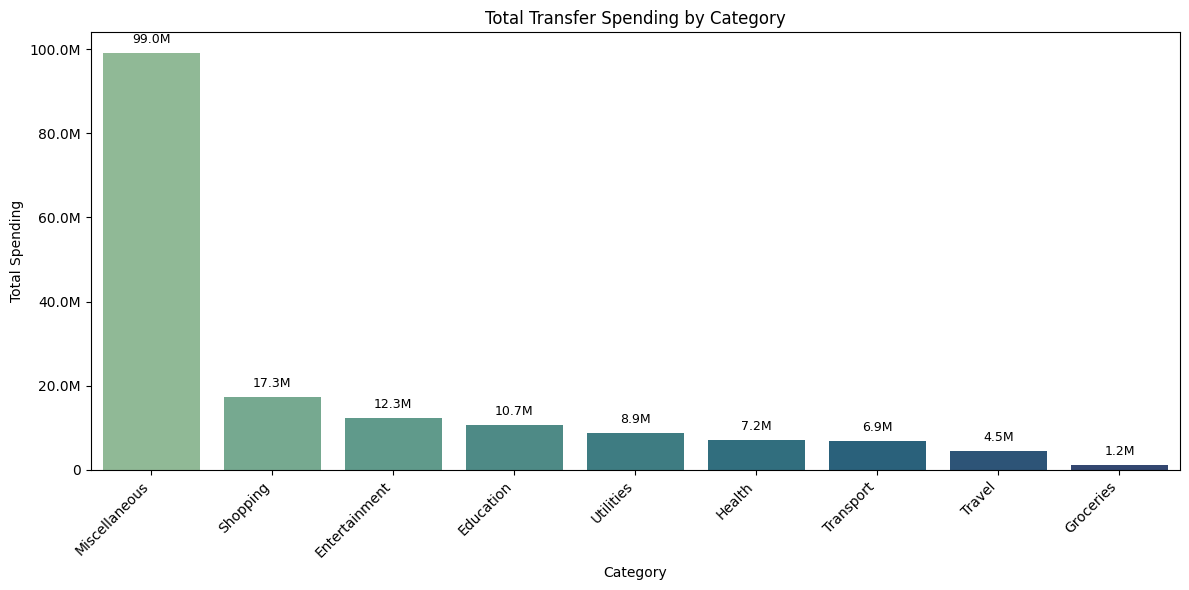

Bar chart saved as 'transfer_category_spending_bar_chart.png'.


In [15]:
# 5. Filter for transfer transactions
transfer_df = df[df['type'] == 'transfer'].copy()

total_transfer_by_category = (
    transfer_df.groupby('Category')['amount']
    .sum()
    .sort_values(ascending=False)
)

print("Total Spending by category (transfer):")
print(total_transfer_by_category)

# Generate and save the transfer bar chart
plt.figure(figsize=(12, 6))
ax_transfer = sns.barplot(x=total_transfer_by_category.index,
                          y=total_transfer_by_category.values,
                          palette='crest')

plt.title('Total Transfer Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

for p in ax_transfer.patches:
    value = p.get_height()
    ax_transfer.annotate(currency_formatter(value, None),
                         (p.get_x() + p.get_width() / 2., value),
                         ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.savefig('transfer_category_spending_bar_chart.png', bbox_inches='tight')
plt.show()

print("Bar chart saved as 'transfer_category_spending_bar_chart.png'.")


### Comparison Across Payment Methods

- The **Miscellaneous** category consistently dominates across all payment types, indicating a need for further refinement or subcategorization.
- **Shopping**, **Entertainment**, and **Education** appear as top categories regardless of payment method, suggesting stable consumer priorities.
- Slight variations in totals (e.g., Shopping: 16.8M debit vs 17.2M credit vs 17.3M transfer) may reflect differences in how people choose to pay for similar items.
- **Transfer spending** is slightly higher than debit and credit in most categories, which could indicate bulk payments, settlements, or business-related transactions.
- These insights can guide budgeting strategies, payment policy reviews, and customer segmentation efforts.
